# Batch processing

## Step 1: Detect Onset-Offset events in behavioral files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Directory where CSV files are located
directory_path = 'H:/Magdalena/photometry/video_analysis_frames/eCB_second'

# List of behavior columns in your dataset
behavior_columns = ['background', 'approach', 'nose-nose', 'nose-tail', 'general', 'fight']

# Function to process each CSV file
def process_csv_file(data_path):
    data = pd.read_csv(data_path)
    behavior_events = []

    for col in behavior_columns:
        # Check if the column exists in the DataFrame
        if col not in data.columns:
            print(f"Warning: Column '{col}' not found in {data_path}. Skipping this column.")
            continue

        onset_indices = data.index[data[col].diff() == 1].tolist()
        offset_indices = data.index[data[col].diff() == -1].tolist()

        if data[col].iloc[0] == 1:
            onset_indices = [0] + onset_indices
        if data[col].iloc[-1] == 1:
            offset_indices = offset_indices + [data.index[-1]]

        for start, end in zip(onset_indices, offset_indices):
            behavior_events.append({
                'Behavior': col,
                'Onset': start,
                'Offset': end
            })

    if behavior_events:  # Check if there are any events to save
        behavior_events_df = pd.DataFrame(behavior_events)
        base_name = os.path.splitext(data_path)[0]
        output_path = f'{base_name}_events.csv'
        behavior_events_df.to_csv(output_path, index=False)
        print(f'Behavior events saved to {output_path}')
    else:
        print(f"No behavior events found in {data_path}. No file created.")

    behavior_events_df = pd.DataFrame(behavior_events)
    base_name = os.path.splitext(data_path)[0]
    output_path = f'{base_name}_events.csv'
    behavior_events_df.to_csv(output_path, index=False)

# Search for all CSV files in the directory and its subdirectories
csv_files = glob.glob(f'{directory_path}/**/*.csv', recursive=True)

# Process each CSV file found
# Process each CSV file found, ignoring files that end with '_events.csv'
for file_path in csv_files:
    if not file_path.endswith('_events.csv'):
        process_csv_file(file_path)


Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\sham\C180dupM1-r-2024-02-16-144539_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\sham\C180dupM2-r-2024-02-16-142400_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\sham\C205dupM1-r-2024-02-16-104631_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\sham\C205dupM2-r-2024-02-16-102530_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\SNI\C180M2-r-2024-02-16-134043_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\SNI\C180M3-r-2024-02-16-140257_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\SNI\C205M1-r-2024-02-16-113016_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames/eCB_second\SNI\C205M2-r-2024-02-16-111012_eve

### Run with CAUTION! Delete all files ending with '_events.csv' in the directory and its subdirectories

In [23]:
# Delete all files ending with '_events.csv' in the directory and its subdirectories

import os
import glob

# Directory where CSV files are located
directory_path = 'H:/Magdalena/photometry/video_analysis_frames'

# Search for all files ending with '_events.csv' in the directory and its subdirectories
events_files = glob.glob(f'{directory_path}/**/*_events.csv', recursive=True)

# Delete each file found
for file_path in events_files:
    try:
        os.remove(file_path)
        print(f'Deleted {file_path}')
    except Exception as e:
        print(f'Error deleting {file_path}: {e}')


Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M1-r-2023-12-01-085245_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M2-r-2023-12-01-091318_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M3-r-2023-12-01-112503_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M1-r-2023-12-01-100015_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M2-r-2023-12-01-102246_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M3-r-2023-12-01-104459_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M4-r-2023-12-01-110519_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM1-r-2024-01-24-140127_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM2-r-2024-01-24-142142_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C205dupM1-r-2024-01-23-135232_eve

## Average within animal

130
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM1-r-2024-02-16-144539.png


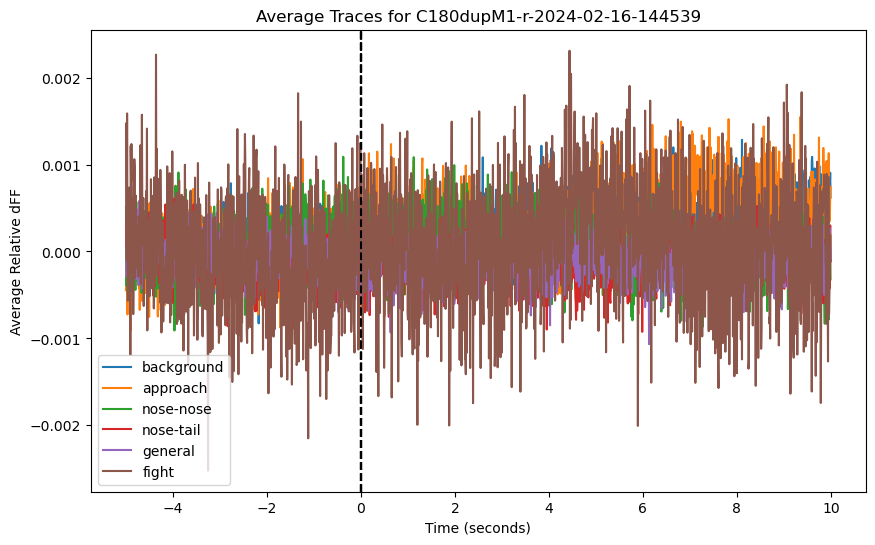

Processed and plotted average traces for: C180dupM1-r-2024-02-16-144539
130
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM2-r-2024-02-16-142400.png


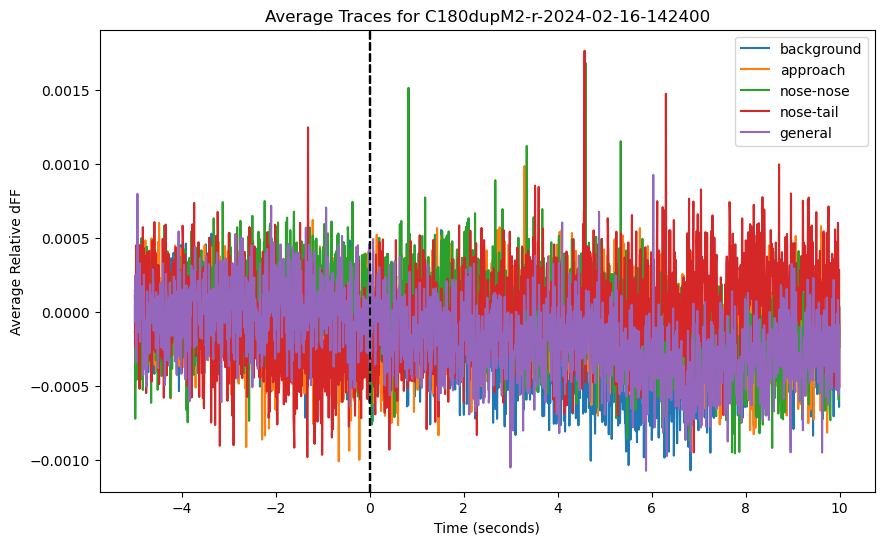

Processed and plotted average traces for: C180dupM2-r-2024-02-16-142400
100
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM1-r-2024-02-16-104631.png


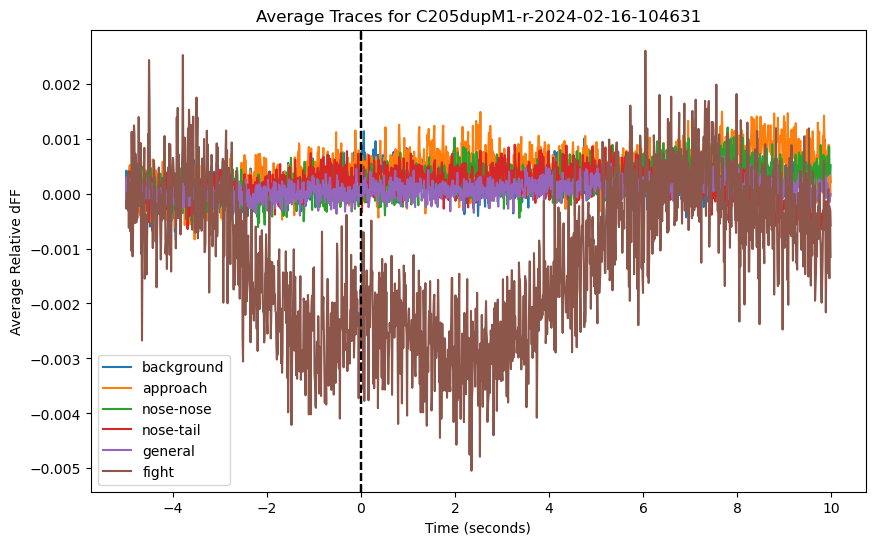

Processed and plotted average traces for: C205dupM1-r-2024-02-16-104631
100
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM2-r-2024-02-16-102530.png


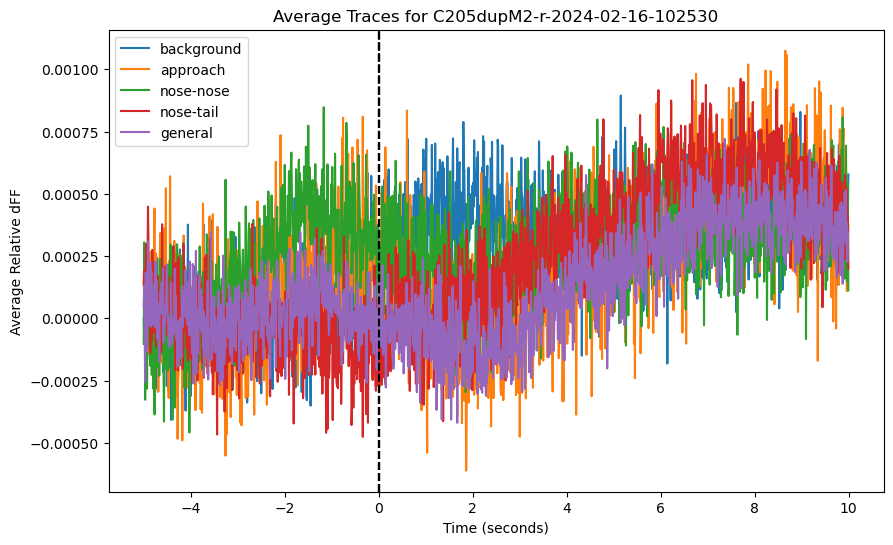

Processed and plotted average traces for: C205dupM2-r-2024-02-16-102530
130
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M2-r-2024-02-16-134043.png


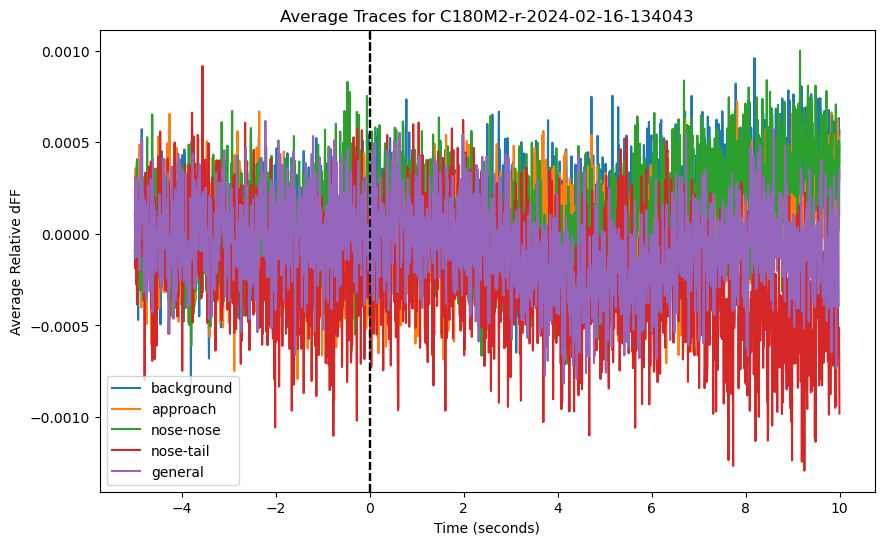

Processed and plotted average traces for: C180M2-r-2024-02-16-134043
130
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M3-r-2024-02-16-140257.png


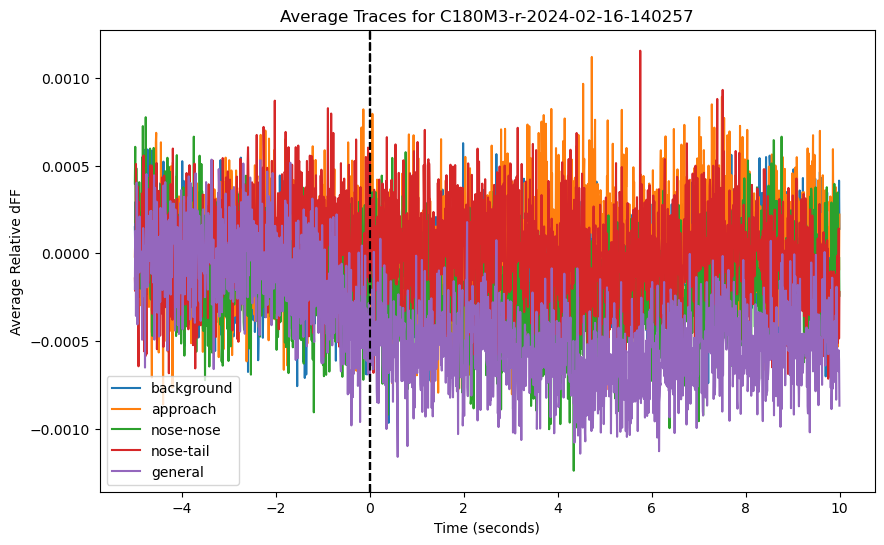

Processed and plotted average traces for: C180M3-r-2024-02-16-140257
100
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C205M1-r-2024-02-16-113016.png


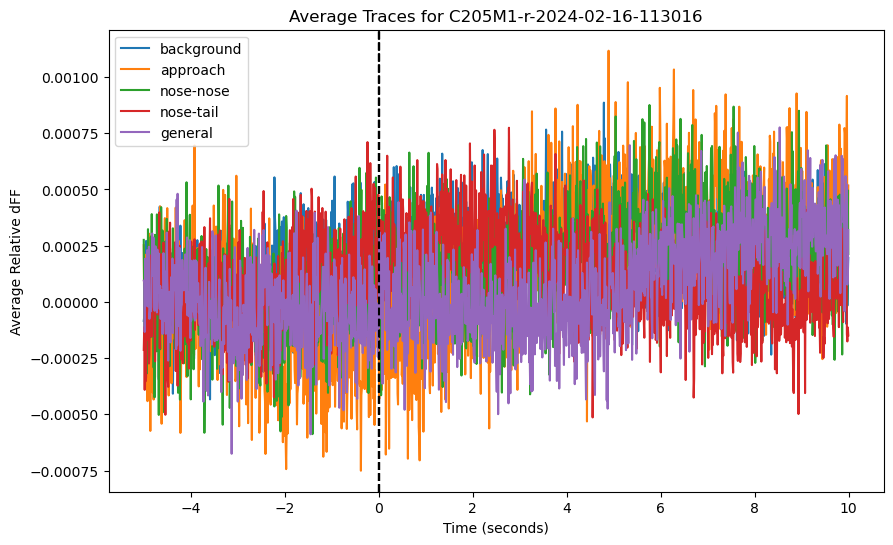

Processed and plotted average traces for: C205M1-r-2024-02-16-113016
100
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C205M2-r-2024-02-16-111012.png


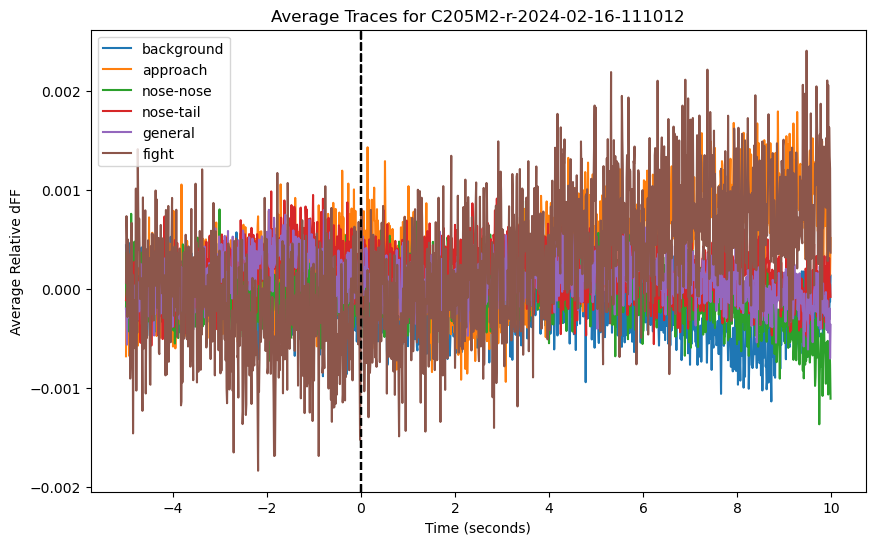

Processed and plotted average traces for: C205M2-r-2024-02-16-111012


In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
from data_import import import_ppd  # Ensure this function is correctly implemented

# Load the LED events Excel file
led_events_path = r'H:\Magdalena\photometry\LED_Event_Detection_Results_eCB_second.xlsx'
led_events_df = pd.read_excel(led_events_path)

# Define directories
ppd_directory_path = r'H:\Magdalena\photometry\fp_recordings\eCB_second'
events_directory_path = r'H:\Magdalena\photometry\video_analysis_frames\eCB_second'

pre_start = 5  # Seconds before the event
post_start = 10  # Seconds after the event

def process_behavior_trace(dFF, behavior_array, sampling_rate, ax, behavior_name):
    """
    Processes trace data for a specific behavior and plots the average trace.
    """
    num_points_per_trace = int((pre_start + post_start) * sampling_rate)
    trace_data_matrix = []
    
    for start_time in behavior_array[:, 0]:
        start = int(start_time - pre_start * sampling_rate)
        end = int(start + num_points_per_trace)
        if start < 0 or end > len(dFF):  # Skip if trace goes out of bounds
            continue
        trace_data = dFF[start:end]
        baseline_start = int(start_time - 5 * sampling_rate)
        baseline_end = int(start_time - 3 * sampling_rate)
        baseline = np.mean(dFF[baseline_start:baseline_end])
        relative_trace_data = trace_data - baseline
        trace_data_matrix.append(relative_trace_data)
    
    if trace_data_matrix:
        trace_data_matrix = np.array(trace_data_matrix)
        average_trace = np.mean(trace_data_matrix, axis=0)
        time = np.arange(-pre_start, post_start, 1 / sampling_rate)
        
        # Plot average trace for the behavior on the shared axis
        ax.plot(time, average_trace, label=behavior_name)
        plt.axvline(x=0, color='black', linestyle='--')  # Add y=0 dashed line


def process_ppd_file(ppd_file_path, led_events_df, events_directory_path):
    filename_base = os.path.splitext(os.path.basename(ppd_file_path))[0]
    data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)
    sampling_rate = data['sampling_rate']
    print(sampling_rate)
    # Convert sample index to time vector
    time = np.arange(len(data['analog_1'])) / sampling_rate
    
    # dFF calculation
    reg = np.polyfit(data['analog_2'], data['analog_1'], 1)
    fit_405 = reg[0] * data['analog_2'] + reg[1]
    dFF = (data['analog_1'] - fit_405) / fit_405

    """     # Save analog_1, analog_2, dFF to CSV
    save_data_path = os.path.join(os.path.dirname(ppd_file_path), filename_base + '_data.csv')
    df_to_save = pd.DataFrame({
        'Time': time,
        'Analog_1': data['analog_1'],
        'Analog_2': data['analog_2'],
        'dFF': dFF
    })
    df_to_save.to_csv(save_data_path, index=False)
    print(f"Data saved to: {save_data_path}") """
    
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot analog signals and fit
    ax1.plot(time, data['analog_1'], label='analog_1')
    ax1.plot(time, data['analog_2'], label='analog_2')
    ax1.plot(time, fit_405, label='fit_405')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.set_title('Analog Signals and Fit')
    ax1.legend()
    
    # Plot dFF
    ax2.plot(time, dFF, label='dFF')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('dFF')
    ax2.set_title('dFF')
    ax2.legend()
    
    plt.tight_layout()
    fig.suptitle(filename_base)
    
    # Save figure
    save_path = os.path.join(os.path.dirname(ppd_file_path), filename_base + '.png')
    fig.savefig(save_path, dpi=300)
    plt.close()  # Close the plot to save memory

    print(f"Processed and saved: {save_path}")

    row = led_events_df[led_events_df.iloc[:, 0] == filename_base]
    if row.empty:
        print(f"{filename_base} not found in LED event detection results.")
        return

    led_on = row['Onset_Point'].values[0]
    led_off = row['Offset_Point'].values[0]
    fps = row['fps'].values[0]

    events_files = glob.glob(f"{events_directory_path}/**/{filename_base}_events.csv", recursive=True)
    if not events_files:
        print(f"No matching events file found for {filename_base}.")
        return

    for events_file in events_files:
        events_data = pd.read_csv(events_file)
        events_data['Onset'] = (events_data['Onset'] - led_on) / fps * sampling_rate
        events_data['Offset'] = (events_data['Offset'] - led_on) / fps * sampling_rate

        unique_behaviors = events_data['Behavior'].unique()
        #unique_behaviors = ['background' 'approach' 'general' 'nose-nose' 'nose-tail' 'fight']
        selected_behaviors = ['background' 'nose-nose']
        behavior_arrays = {}
        for behavior in unique_behaviors:
            filtered_events = events_data[events_data['Behavior'] == behavior]
            behavior_array = np.column_stack((filtered_events['Onset'].values, filtered_events['Offset'].values))
            behavior_arrays[behavior] = behavior_array

    fig, ax = plt.subplots(figsize=(10, 6))  # Shared plot for all behaviors
    
    # Process and plot each behavior on the same axes
    for behavior, behavior_array in behavior_arrays.items():
        process_behavior_trace(dFF, behavior_array, sampling_rate, ax, behavior)
    
    # Finalizing the plot
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Average Relative dFF')
    ax.set_title(f'Average Traces for {filename_base}')
    ax.legend()
    plt.show()

    print(f"Processed and plotted average traces for: {filename_base}")



# Process each .ppd file found in the directory
for ppd_file_path in glob.glob(os.path.join(ppd_directory_path, '**', '*.ppd'), recursive=True):
    process_ppd_file(ppd_file_path, led_events_df, events_directory_path)


# Avg of all pooled trials

## compare Sham and SNI

Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM1-r-2024-02-16-144539.png
index: (array([585, 715], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM2-r-2024-02-16-142400.png
index: (array([587, 718], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM1-r-2024-02-16-104631.png
index: (array([634, 734], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM2-r-2024-02-16-102530.png
index: (array([664, 764], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M2-r-2024-02-16-134043.png
index: (array([1090, 1220], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M3-r-2024-02-16-140257.png
index: (array([814, 944], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C205M1-r-2024-02-16-113016.png
i

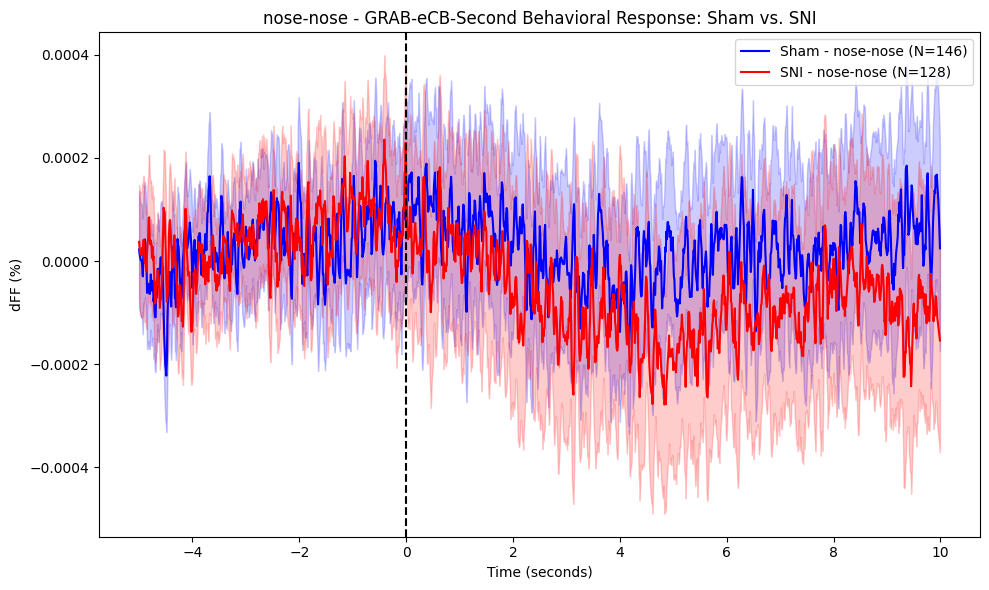

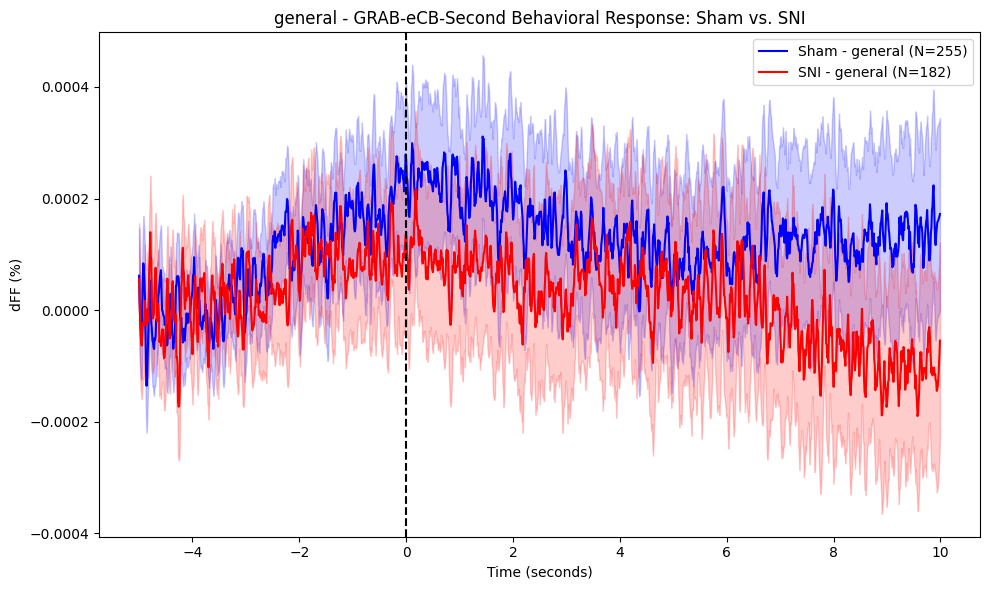

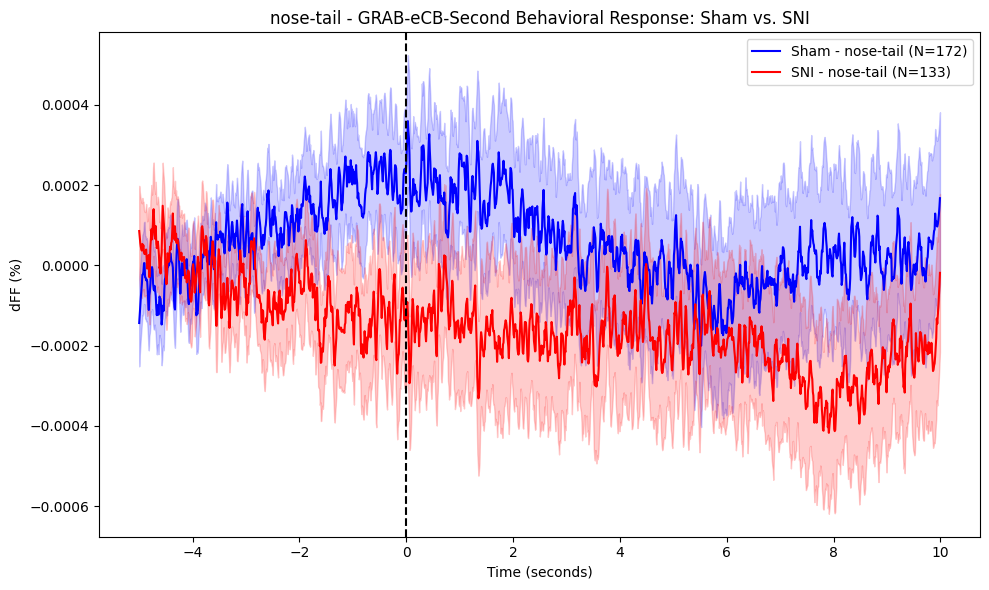

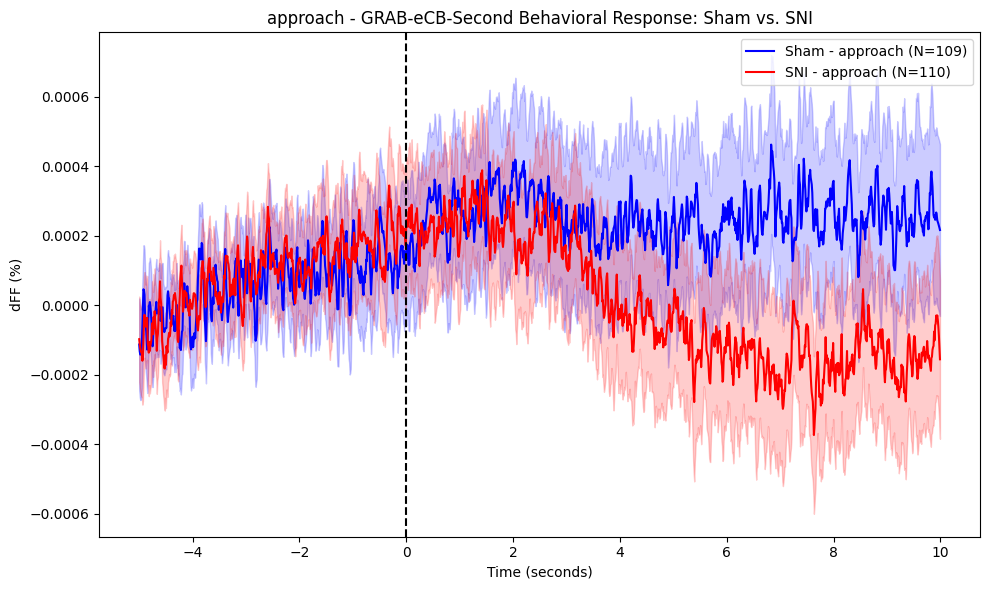

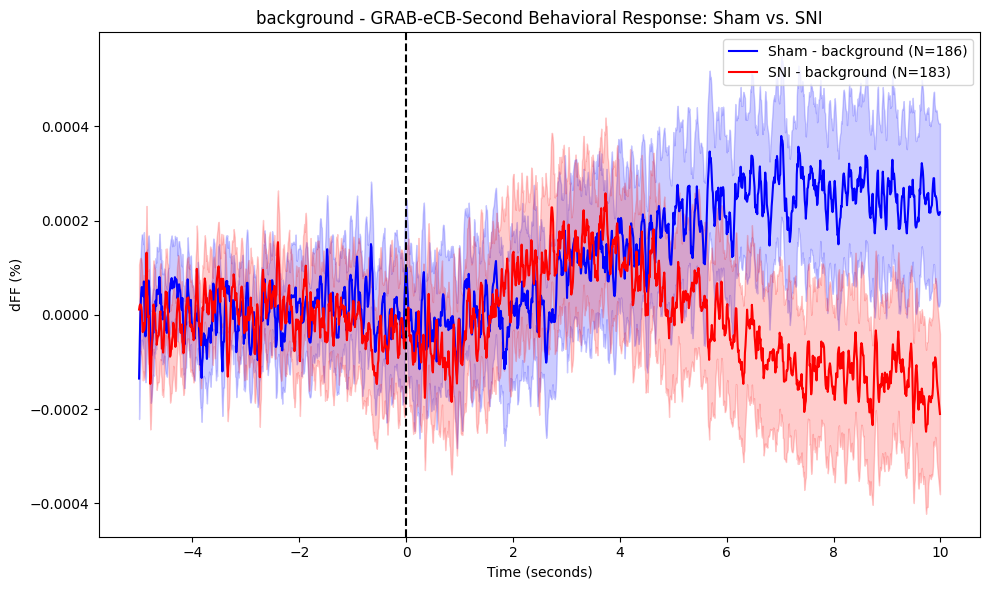

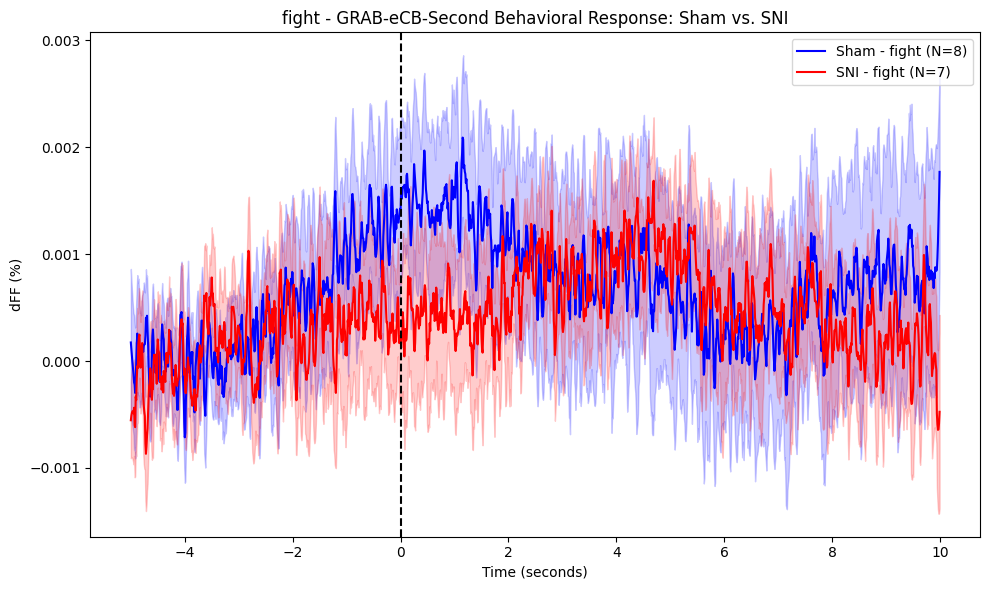

In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
from numpy.typing import NDArray
from data_import import import_ppd  # Ensure this function is correctly implemented


# Load the LED events Excel file
led_events_path = r'H:\Magdalena\photometry\LED_Event_Detection_Results_eCB_second.xlsx'
led_events_df = pd.read_excel(led_events_path)

sampling_rate = 100
target_sampling_rate = 100  # Hz
pre_start = 5  # Seconds before the event
post_start = 10  # Seconds after the event
behavior_trace_data = {}  # Dictionary to store behavior trace data


def process_behavior_trace(dFF, behavior_array, sampling_rate, behavior_name):
    """
    Processes trace data for a specific behavior and stores individual traces.
    """
    num_points_per_trace = int((pre_start + post_start) * sampling_rate)
    
    for start_time in behavior_array[:, 0]:
        start = int(start_time - pre_start * sampling_rate)
        end = int(start + num_points_per_trace)
        if start < 0 or end > len(dFF):  # Skip if trace goes out of bounds
            continue
        trace_data = dFF[start:end]
        baseline_start = int(start_time - 5 * sampling_rate)
        baseline_end = int(start_time - 3 * sampling_rate)
        baseline = np.mean(dFF[baseline_start:baseline_end])
        relative_trace_data = trace_data - baseline
        
        # Store individual traces in the behavior_trace_data dictionary
        if behavior_name not in behavior_trace_data:
            behavior_trace_data[behavior_name] = [relative_trace_data]
        else:
            behavior_trace_data[behavior_name].append(relative_trace_data)


def process_group(ppd_directory_path, events_directory_path):
    global behavior_trace_data
    behavior_trace_data = {}  # Reset for each group

    # Process each .ppd file in the directory for the current group
    for ppd_file_path in glob.glob(os.path.join(ppd_directory_path, '**', '*.ppd'), recursive=True):
        process_ppd_file(ppd_file_path, led_events_df, events_directory_path)
    
    # Prepare data for plotting with trial numbers
    group_data = {}
    for behavior, individual_traces in behavior_trace_data.items():
        pooled_traces = np.stack(individual_traces, axis=0)
        average_trace = np.mean(pooled_traces, axis=0)
        sem = np.std(pooled_traces, axis=0) / np.sqrt(pooled_traces.shape[0])
        smoothed_average_trace = savgol_filter(average_trace, window_length=11, polyorder=2)
        smoothed_sem = savgol_filter(sem, window_length=11, polyorder=2)
        num_trials = len(individual_traces)  # Count the number of trials
        group_data[behavior] = (smoothed_average_trace, smoothed_sem, num_trials)
    return group_data



def process_ppd_file(ppd_file_path, led_events_df, events_directory_path):
    filename_base = os.path.splitext(os.path.basename(ppd_file_path))[0]
    data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)
    sampling_rate = data['sampling_rate']
    # Convert sample index to time vector
    time = np.arange(len(data['analog_1'])) / sampling_rate
    
    # dFF calculation
    reg = np.polyfit(data['analog_2'], data['analog_1'], 1)
    fit_405 = reg[0] * data['analog_2'] + reg[1]
    dFF = (data['analog_1'] - fit_405) / fit_405

    """     # Save analog_1, analog_2, dFF to CSV
    save_data_path = os.path.join(os.path.dirname(ppd_file_path), filename_base + '_data.csv')
    df_to_save = pd.DataFrame({
        'Time': time,
        'Analog_1': data['analog_1'],
        'Analog_2': data['analog_2'],
        'dFF': dFF
    })
    df_to_save.to_csv(save_data_path, index=False)
    print(f"Data saved to: {save_data_path}") """
    
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot analog signals and fit
    ax1.plot(time, data['analog_1'], label='analog_1')
    ax1.plot(time, data['analog_2'], label='analog_2')
    ax1.plot(time, fit_405, label='fit_405')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.set_title('Analog Signals and Fit')
    ax1.legend()
    
    # Plot dFF
    ax2.plot(time, dFF, label='dFF')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('dFF')
    ax2.set_title('dFF')
    ax2.legend()
    
    plt.tight_layout()
    fig.suptitle(filename_base)
    
    # Save figure
    save_path = os.path.join(os.path.dirname(ppd_file_path), filename_base + '.png')
    fig.savefig(save_path, dpi=300)
    plt.close()  # Close the plot to save memory

    print(f"Processed and saved: {save_path}")

    # Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
    index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))

    # Print the onsets and offsets
    print("index:", index)

    dFF = dFF[index[0][0]:]

    if sampling_rate != 100:
        # Calculate the total duration of the signal in seconds
        duration = len(dFF) / sampling_rate  # Number of samples divided by the original sampling rate

        # Calculate the number of samples in the resampled signal
        num_samples_target = int(duration * target_sampling_rate)  # Duration times target sampling rate

        # Resample the data
        dFF = resample(dFF, num_samples_target)

        # Generate the new time vector for the resampled data
        time = np.linspace(0, duration, num_samples_target)

    row = led_events_df[led_events_df.iloc[:, 0] == filename_base]
    if row.empty:
        print(f"{filename_base} not found in LED event detection results.")
        return

    led_on = row['Onset_Point'].values[0]
    led_off = row['Offset_Point'].values[0]
    fps = row['fps'].values[0]

    events_files = glob.glob(f"{events_directory_path}/**/{filename_base}_events.csv", recursive=True)
    if not events_files:
        print(f"No matching events file found for {filename_base}.")
        return

    for events_file in events_files:
        events_data = pd.read_csv(events_file)
        events_data['Onset'] = (events_data['Onset'] - led_on) / fps * target_sampling_rate
        events_data['Offset'] = (events_data['Offset'] - led_on) / fps * target_sampling_rate

        unique_behaviors = events_data['Behavior'].unique()
        #unique_behaviors = ['background' 'approach' 'general' 'nose-nose' 'nose-tail' 'fight']
        selected_behaviors = ['background' 'nose-nose']
        behavior_arrays = {}
        for behavior in unique_behaviors:
            filtered_events = events_data[events_data['Behavior'] == behavior]
            behavior_array = np.column_stack((filtered_events['Onset'].values, filtered_events['Offset'].values))
            behavior_arrays[behavior] = behavior_array
    
    # Process and plot each behavior on the same axes
    for behavior, behavior_array in behavior_arrays.items():
        process_behavior_trace(dFF, behavior_array, target_sampling_rate, behavior)





# Define paths for Sham and SNI groups
sham_paths = {
    'ppd_directory_path': r'H:\Magdalena\photometry\fp_recordings\eCB_second\sham',
    'events_directory_path': r'H:\Magdalena\photometry\video_analysis_frames\eCB_second\sham'
}
sni_paths = {
    'ppd_directory_path': r'H:\Magdalena\photometry\fp_recordings\eCB_second\SNI',
    'events_directory_path': r'H:\Magdalena\photometry\video_analysis_frames\eCB_second\SNI'
}

# Process data for both groups
sham_data = process_group(**sham_paths)
sni_data = process_group(**sni_paths)

# Determine all behaviors to plot
all_behaviors = set(sham_data.keys()).union(sni_data.keys())

# Plot data for each behavior with trial numbers in the legend
for behavior in all_behaviors:
    plt.figure(figsize=(10, 6))
    time = np.arange(-pre_start, post_start, 1 / sampling_rate)
    
    # Plot Sham data if available
    if behavior in sham_data:
        avg_trace, sem, num_trials_sham = sham_data[behavior]
        plt.plot(time, avg_trace, label=f'Sham - {behavior} (N={num_trials_sham})', color='blue')
        plt.fill_between(time, avg_trace - sem, avg_trace + sem, color='blue', alpha=0.2)
    
    # Plot SNI data if available
    if behavior in sni_data:
        avg_trace, sem, num_trials_sni = sni_data[behavior]
        plt.plot(time, avg_trace, label=f'SNI - {behavior} (N={num_trials_sni})', color='red')
        plt.fill_between(time, avg_trace - sem, avg_trace + sem, color='red', alpha=0.2)
    
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlabel('Time (seconds)')
    plt.ylabel('dFF (%)')
    plt.title(f'{behavior} - GRAB-eCB-Second Behavioral Response: Sham vs. SNI')
    plt.legend()
    plt.tight_layout()
    plt.show()





## Stats

Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM1-r-2024-02-16-144539.png
index: (array([585, 715], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM2-r-2024-02-16-142400.png
index: (array([587, 718], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM1-r-2024-02-16-104631.png
index: (array([634, 734], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM2-r-2024-02-16-102530.png
index: (array([664, 764], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M2-r-2024-02-16-134043.png
index: (array([1090, 1220], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M3-r-2024-02-16-140257.png
index: (array([814, 944], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C205M1-r-2024-02-16-113016.png
i

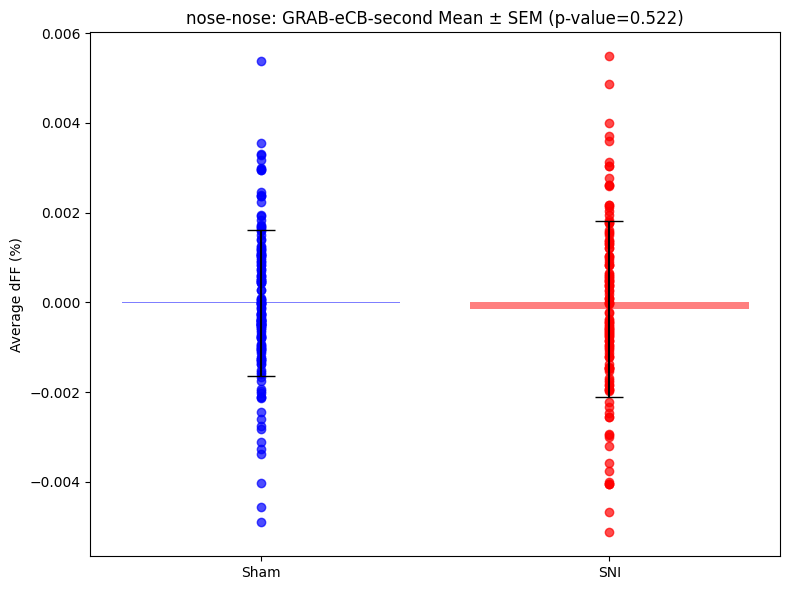

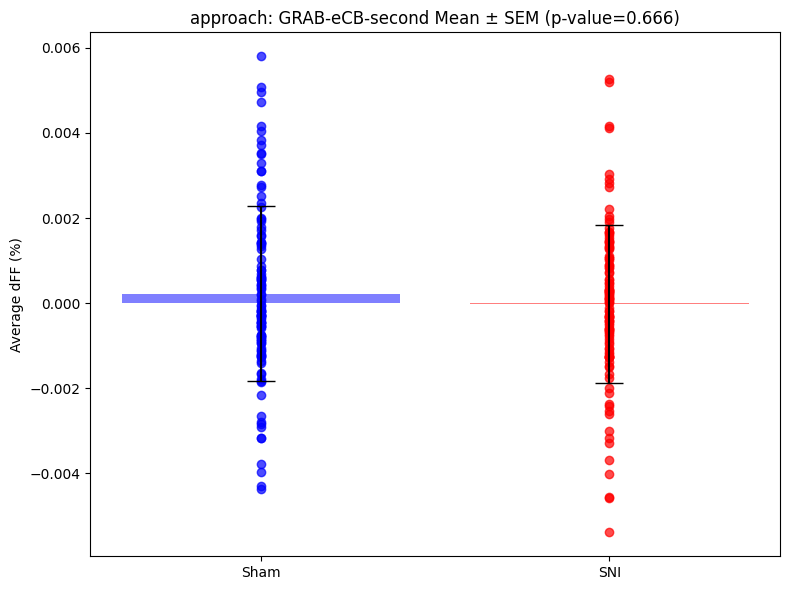

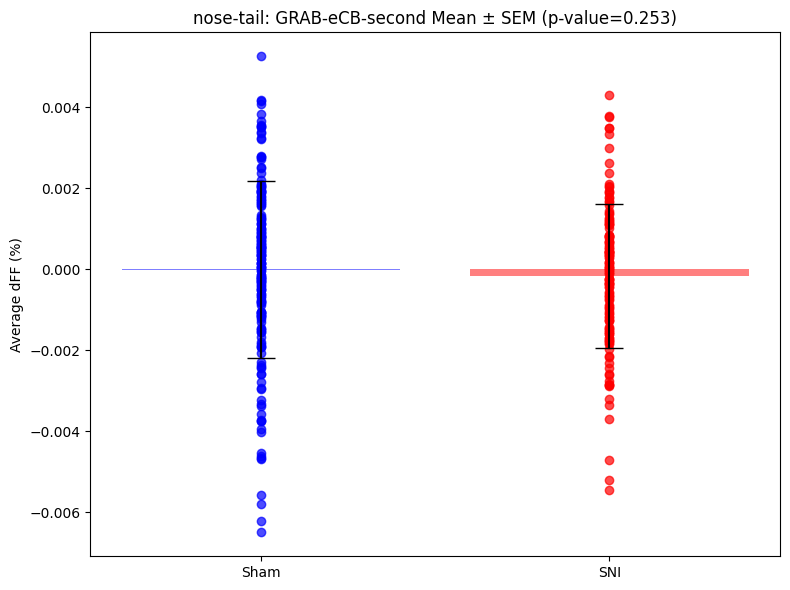

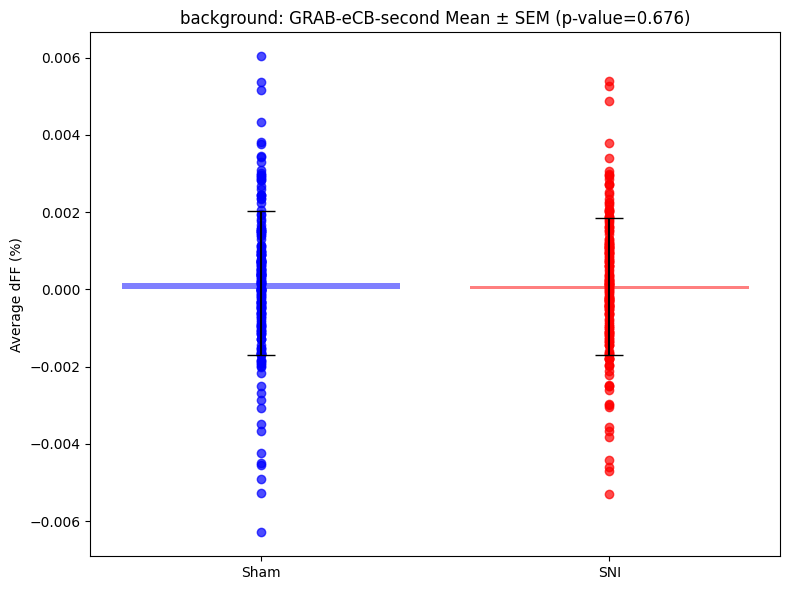

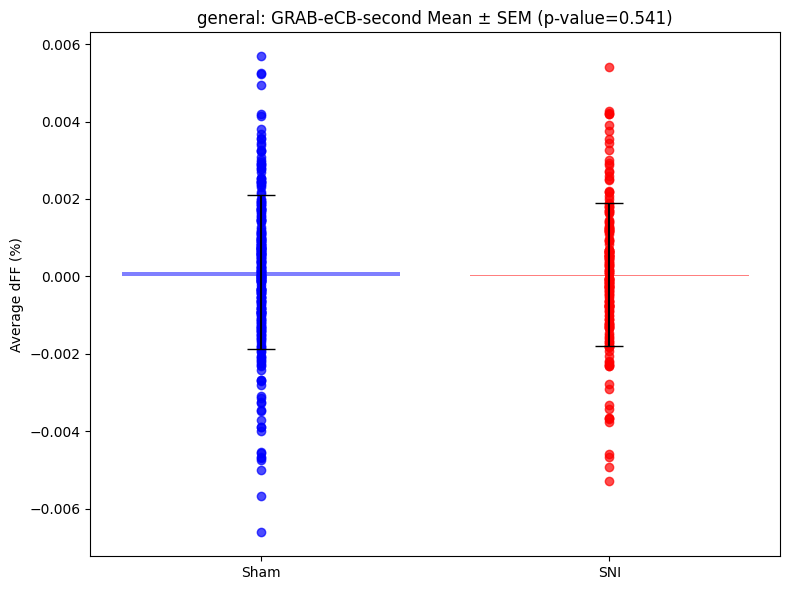

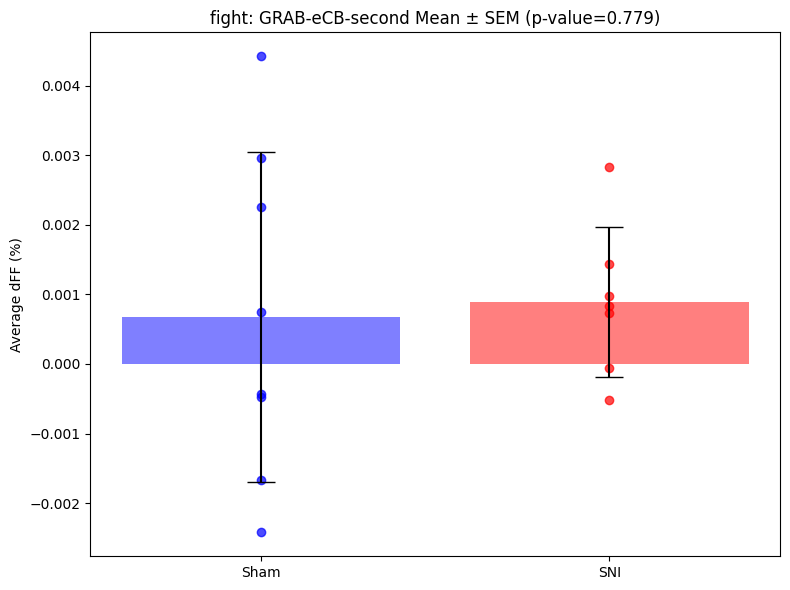

In [5]:
from scipy.stats import mannwhitneyu

# Function to process each group and calculate stats
def process_group_and_calculate_stats(ppd_directory_path, events_directory_path, onset_index):
    global behavior_trace_data
    behavior_trace_data = {}
    for ppd_file_path in glob.glob(os.path.join(ppd_directory_path, '**', '*.ppd'), recursive=True):
        process_ppd_file(ppd_file_path, led_events_df, events_directory_path)
    
    group_stats = {}
    for behavior, traces in behavior_trace_data.items():
        # Calculate stats for 3-5 seconds post-onset
        post_onset_data = [trace[onset_index + int(3 * sampling_rate) : onset_index + int(6 * sampling_rate)] for trace in traces]
        means = [np.mean(trace) for trace in post_onset_data]
        sems = [np.std(trace, ddof=1) / np.sqrt(len(trace)) for trace in post_onset_data]
        group_stats[behavior] = {
            "means": means,
            "sems": sems,
            "all_data": [np.mean(trace) for trace in post_onset_data]  # All individual data points
        }
    return group_stats

# Process both Sham and SNI groups
onset_index = int(pre_start * sampling_rate)
sham_stats = process_group_and_calculate_stats(**sham_paths, onset_index=onset_index)
sni_stats = process_group_and_calculate_stats(**sni_paths, onset_index=onset_index)

# Plotting and Statistical Test
for behavior in set(sham_stats).union(sni_stats):
    if behavior in sham_stats and behavior in sni_stats:
        # Mann-Whitney U test
        stat, p_value = mannwhitneyu(sham_stats[behavior]["all_data"], sni_stats[behavior]["all_data"])

        # Plotting
        fig, ax = plt.subplots(figsize=(8, 6))
        indices = np.arange(2)
        means = [np.mean(sham_stats[behavior]["all_data"]), np.mean(sni_stats[behavior]["all_data"])]
        sds = [np.std(sham_stats[behavior]["all_data"], ddof=1), np.std(sni_stats[behavior]["all_data"], ddof=1)]
        sems = [np.std(sham_stats[behavior]["all_data"], ddof=1) / np.sqrt(len(sham_stats[behavior]["all_data"])),
                np.std(sni_stats[behavior]["all_data"], ddof=1) / np.sqrt(len(sni_stats[behavior]["all_data"]))]

        ax.bar(indices, means, yerr=sds, align='center', alpha=0.5, ecolor='black', capsize=10, color=['blue', 'red'])
        ax.set_ylabel('Average dFF (%)')
        ax.set_xticks(indices)
        ax.set_xticklabels(['Sham', 'SNI'])
        ax.set_title(f'{behavior}: GRAB-eCB-second Mean ± SEM (p-value={p_value:.3f})')

        # Scatter individual data points
        ax.scatter(np.zeros(len(sham_stats[behavior]["all_data"])), sham_stats[behavior]["all_data"], color='blue', alpha=0.7)
        ax.scatter(np.ones(len(sni_stats[behavior]["all_data"])), sni_stats[behavior]["all_data"], color='red', alpha=0.7)

        plt.tight_layout()
        plt.show()


## Average across animals

Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM1-r-2024-02-16-144539.png
index: (array([585, 715], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM2-r-2024-02-16-142400.png
index: (array([587, 718], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM1-r-2024-02-16-104631.png
index: (array([634, 734], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM2-r-2024-02-16-102530.png
index: (array([664, 764], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M2-r-2024-02-16-134043.png
index: (array([1090, 1220], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M3-r-2024-02-16-140257.png
index: (array([814, 944], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C205M1-r-2024-02-16-113016.png
i

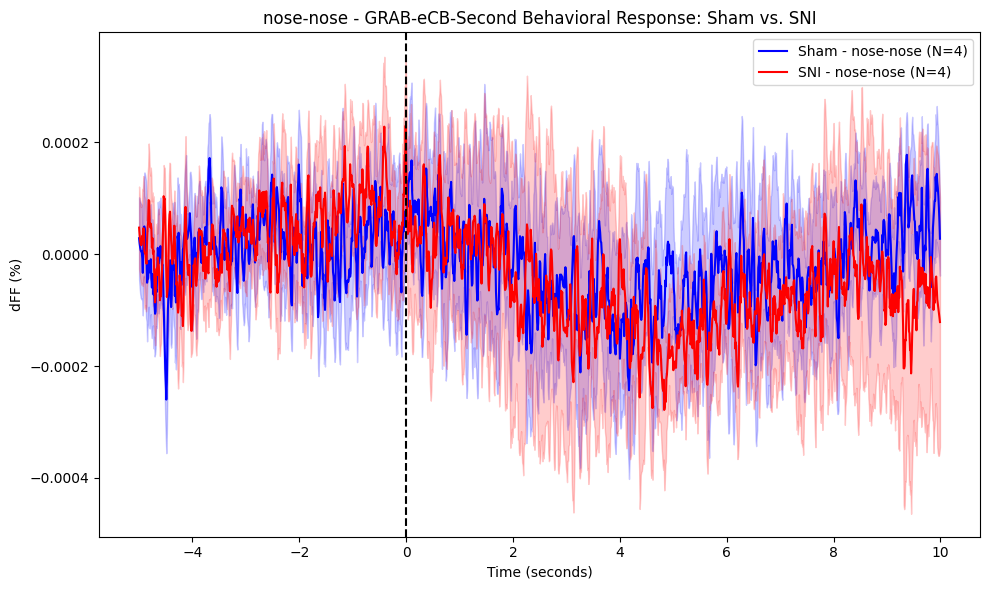

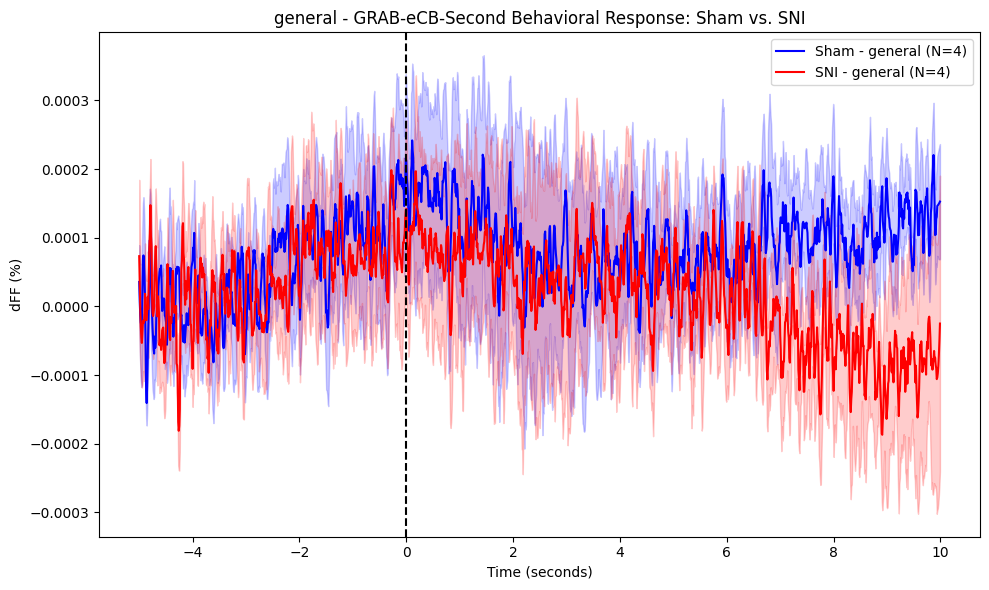

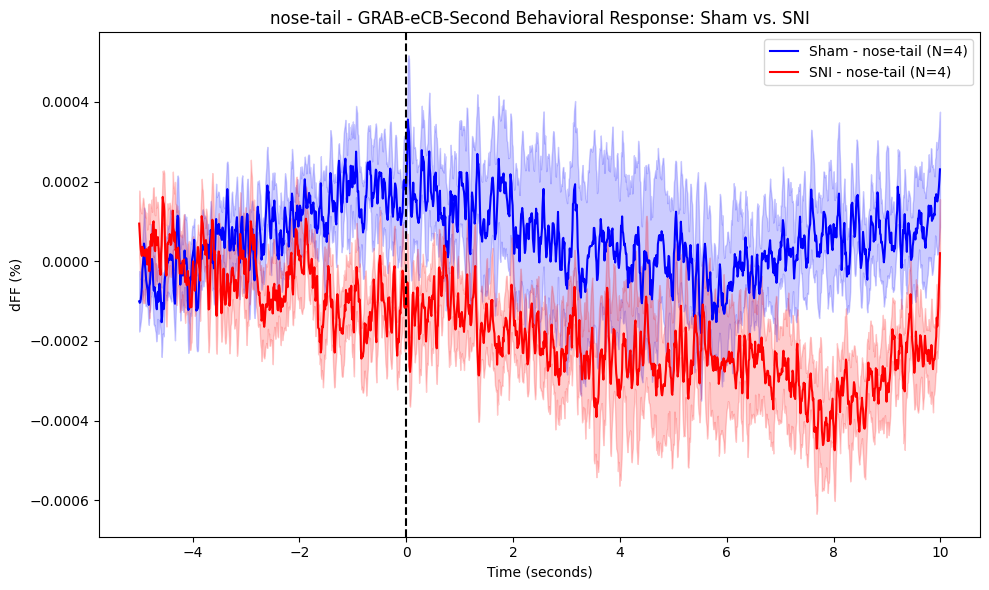

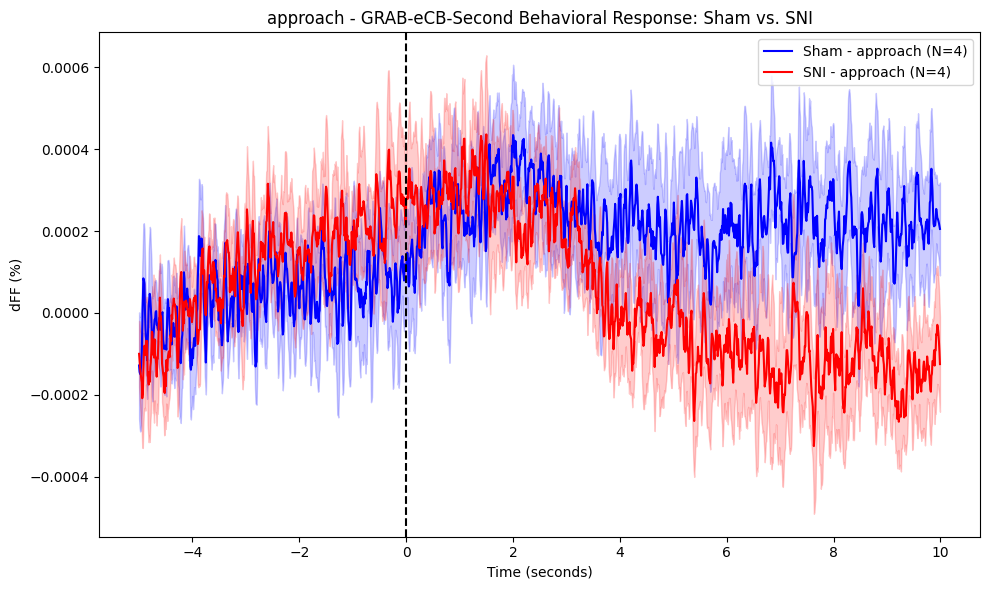

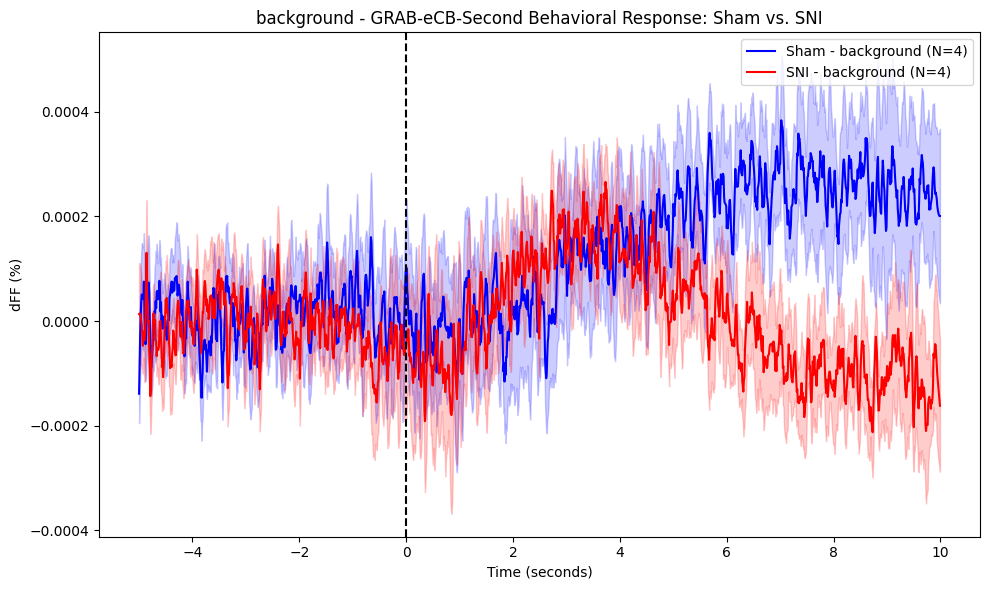

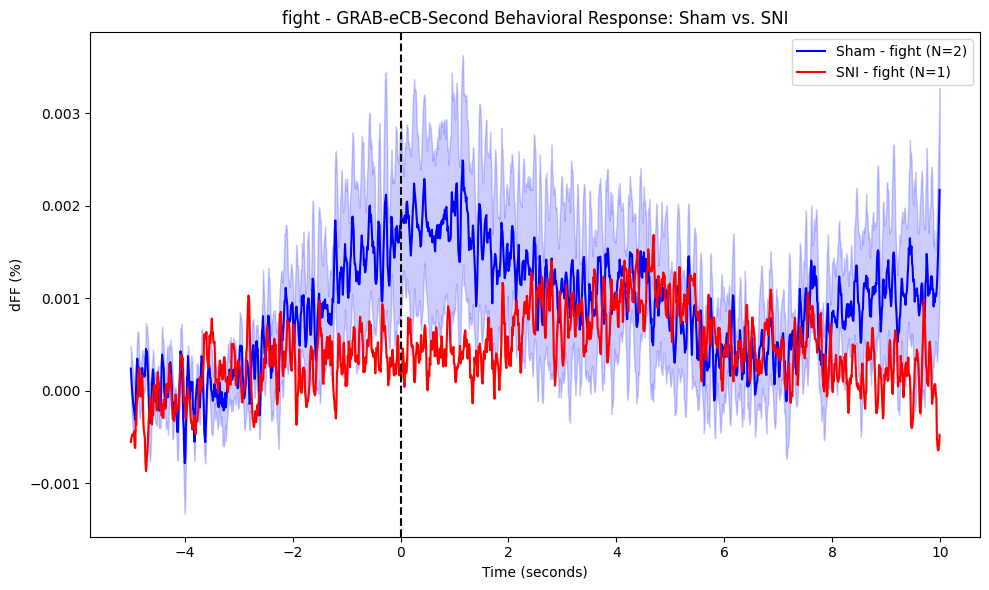

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
from scipy.signal import resample  # Assuming this is needed for resampling
from data_import import import_ppd  # Ensure this function is correctly implemented

# Assuming other parts of the code remain unchanged, focusing on required modifications:

def process_behavior_trace(dFF, behavior_array, sampling_rate, behavior_name):
    """
    Processes trace data for a specific behavior and stores averages of individual traces.
    """
    num_points_per_trace = int((pre_start + post_start) * sampling_rate)
    traces = []
    
    for start_time in behavior_array[:, 0]:
        start = int(start_time - pre_start * sampling_rate)
        end = int(start + num_points_per_trace)
        if start < 0 or end > len(dFF):  # Skip if trace goes out of bounds
            continue
        trace_data = dFF[start:end]
        baseline_start = int(start_time - 5 * sampling_rate)
        baseline_end = int(start_time - 3 * sampling_rate)
        baseline = np.mean(dFF[baseline_start:baseline_end])
        relative_trace_data = trace_data - baseline
        
        traces.append(relative_trace_data)
    
    # Store the average of individual traces if any traces were processed
    if traces:
        average_trace = np.mean(traces, axis=0)
        if behavior_name not in behavior_trace_data:
            behavior_trace_data[behavior_name] = [average_trace]
        else:
            behavior_trace_data[behavior_name].append(average_trace)

def process_group(ppd_directory_path, events_directory_path):
    global behavior_trace_data
    behavior_trace_data = {}  # Reset for each group

    # Process each .ppd file in the directory for the current group
    for ppd_file_path in glob.glob(os.path.join(ppd_directory_path, '**', '*.ppd'), recursive=True):
        process_ppd_file(ppd_file_path, led_events_df, events_directory_path)
    
    # Prepare data for plotting with trial averages
    group_data = {}
    for behavior, averages in behavior_trace_data.items():
        # Here, averages already contains the average trace per trial
        pooled_averages = np.stack(averages, axis=0)
        grand_average = np.mean(pooled_averages, axis=0)
        sem = np.std(pooled_averages, axis=0) / np.sqrt(pooled_averages.shape[0])
        smoothed_average = savgol_filter(grand_average, window_length=11, polyorder=2)
        smoothed_sem = savgol_filter(sem, window_length=11, polyorder=2)
        num_trials = len(averages)  # Count the number of trials
        group_data[behavior] = (smoothed_average, smoothed_sem, num_trials)
    return group_data

def process_ppd_file(ppd_file_path, led_events_df, events_directory_path):
    filename_base = os.path.splitext(os.path.basename(ppd_file_path))[0]
    data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)
    sampling_rate = data['sampling_rate']
    # Convert sample index to time vector
    time = np.arange(len(data['analog_1'])) / sampling_rate
    
    # dFF calculation
    reg = np.polyfit(data['analog_2'], data['analog_1'], 1)
    fit_405 = reg[0] * data['analog_2'] + reg[1]
    dFF = (data['analog_1'] - fit_405) / fit_405

    """     # Save analog_1, analog_2, dFF to CSV
    save_data_path = os.path.join(os.path.dirname(ppd_file_path), filename_base + '_data.csv')
    df_to_save = pd.DataFrame({
        'Time': time,
        'Analog_1': data['analog_1'],
        'Analog_2': data['analog_2'],
        'dFF': dFF
    })
    df_to_save.to_csv(save_data_path, index=False)
    print(f"Data saved to: {save_data_path}") """
    
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot analog signals and fit
    ax1.plot(time, data['analog_1'], label='analog_1')
    ax1.plot(time, data['analog_2'], label='analog_2')
    ax1.plot(time, fit_405, label='fit_405')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.set_title('Analog Signals and Fit')
    ax1.legend()
    
    # Plot dFF
    ax2.plot(time, dFF, label='dFF')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('dFF')
    ax2.set_title('dFF')
    ax2.legend()
    
    plt.tight_layout()
    fig.suptitle(filename_base)
    
    # Save figure
    save_path = os.path.join(os.path.dirname(ppd_file_path), filename_base + '.png')
    fig.savefig(save_path, dpi=300)
    plt.close()  # Close the plot to save memory

    print(f"Processed and saved: {save_path}")

    # Index of np.diff(data['digital_1']) bigger than 0.5 or smaller than -0.5
    index = np.where((np.diff(data['digital_1']) > 0.5) | (np.diff(data['digital_1']) < -0.5))

    # Print the onsets and offsets
    print("index:", index)

    dFF = dFF[index[0][0]:]

    if sampling_rate != 100:
        # Calculate the total duration of the signal in seconds
        duration = len(dFF) / sampling_rate  # Number of samples divided by the original sampling rate

        # Calculate the number of samples in the resampled signal
        num_samples_target = int(duration * target_sampling_rate)  # Duration times target sampling rate

        # Resample the data
        dFF = resample(dFF, num_samples_target)

        # Generate the new time vector for the resampled data
        time = np.linspace(0, duration, num_samples_target)

    row = led_events_df[led_events_df.iloc[:, 0] == filename_base]
    if row.empty:
        print(f"{filename_base} not found in LED event detection results.")
        return

    led_on = row['Onset_Point'].values[0]
    led_off = row['Offset_Point'].values[0]
    fps = row['fps'].values[0]

    events_files = glob.glob(f"{events_directory_path}/**/{filename_base}_events.csv", recursive=True)
    if not events_files:
        print(f"No matching events file found for {filename_base}.")
        return

    for events_file in events_files:
        events_data = pd.read_csv(events_file)
        events_data['Onset'] = (events_data['Onset'] - led_on) / fps * target_sampling_rate
        events_data['Offset'] = (events_data['Offset'] - led_on) / fps * target_sampling_rate

        unique_behaviors = events_data['Behavior'].unique()
        #unique_behaviors = ['background' 'approach' 'general' 'nose-nose' 'nose-tail' 'fight']
        selected_behaviors = ['background' 'nose-nose']
        behavior_arrays = {}
        for behavior in unique_behaviors:
            filtered_events = events_data[events_data['Behavior'] == behavior]
            behavior_array = np.column_stack((filtered_events['Onset'].values, filtered_events['Offset'].values))
            behavior_arrays[behavior] = behavior_array
    
    # Process and plot each behavior on the same axes
    for behavior, behavior_array in behavior_arrays.items():
        process_behavior_trace(dFF, behavior_array, target_sampling_rate, behavior)





# Define paths for Sham and SNI groups
sham_paths = {
    'ppd_directory_path': r'H:\Magdalena\photometry\fp_recordings\eCB_second\sham',
    'events_directory_path': r'H:\Magdalena\photometry\video_analysis_frames\eCB_second\sham'
}
sni_paths = {
    'ppd_directory_path': r'H:\Magdalena\photometry\fp_recordings\eCB_second\SNI',
    'events_directory_path': r'H:\Magdalena\photometry\video_analysis_frames\eCB_second\SNI'
}

# Process data for both groups
sham_data = process_group(**sham_paths)
sni_data = process_group(**sni_paths)

# Determine all behaviors to plot
all_behaviors = set(sham_data.keys()).union(sni_data.keys())

# Plot data for each behavior with trial numbers in the legend
for behavior in all_behaviors:
    plt.figure(figsize=(10, 6))
    time = np.arange(-pre_start, post_start, 1 / sampling_rate)
    
    # Plot Sham data if available
    if behavior in sham_data:
        avg_trace, sem, num_trials_sham = sham_data[behavior]
        plt.plot(time, avg_trace, label=f'Sham - {behavior} (N={num_trials_sham})', color='blue')
        plt.fill_between(time, avg_trace - sem, avg_trace + sem, color='blue', alpha=0.2)
    
    # Plot SNI data if available
    if behavior in sni_data:
        avg_trace, sem, num_trials_sni = sni_data[behavior]
        plt.plot(time, avg_trace, label=f'SNI - {behavior} (N={num_trials_sni})', color='red')
        plt.fill_between(time, avg_trace - sem, avg_trace + sem, color='red', alpha=0.2)
    
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlabel('Time (seconds)')
    plt.ylabel('dFF (%)')
    plt.title(f'{behavior} - GRAB-eCB-Second Behavioral Response: Sham vs. SNI')
    plt.legend()
    plt.tight_layout()
    plt.show()




## Stats

Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM1-r-2024-02-16-144539.png
index: (array([585, 715], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C180dupM2-r-2024-02-16-142400.png
index: (array([587, 718], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM1-r-2024-02-16-104631.png
index: (array([634, 734], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\sham\C205dupM2-r-2024-02-16-102530.png
index: (array([664, 764], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M2-r-2024-02-16-134043.png
index: (array([1090, 1220], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C180M3-r-2024-02-16-140257.png
index: (array([814, 944], dtype=int64),)
Processed and saved: H:\Magdalena\photometry\fp_recordings\eCB_second\SNI\C205M1-r-2024-02-16-113016.png
i

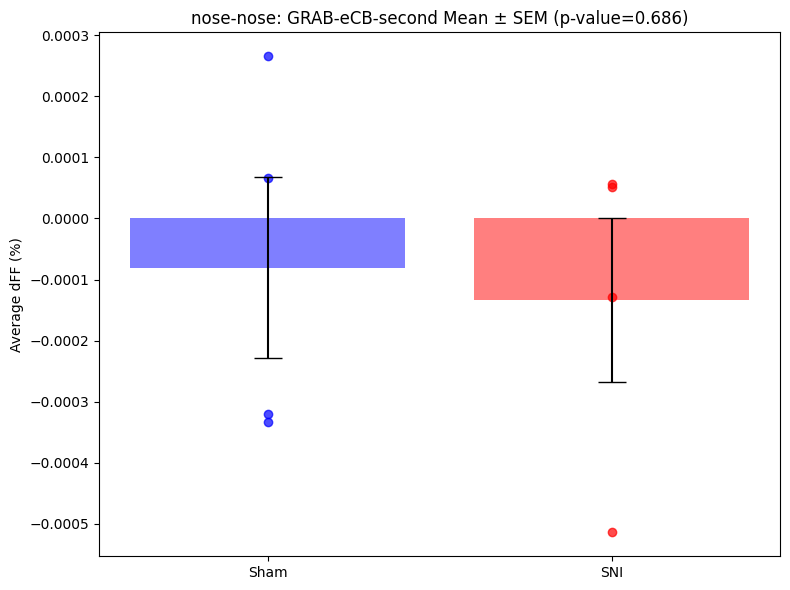

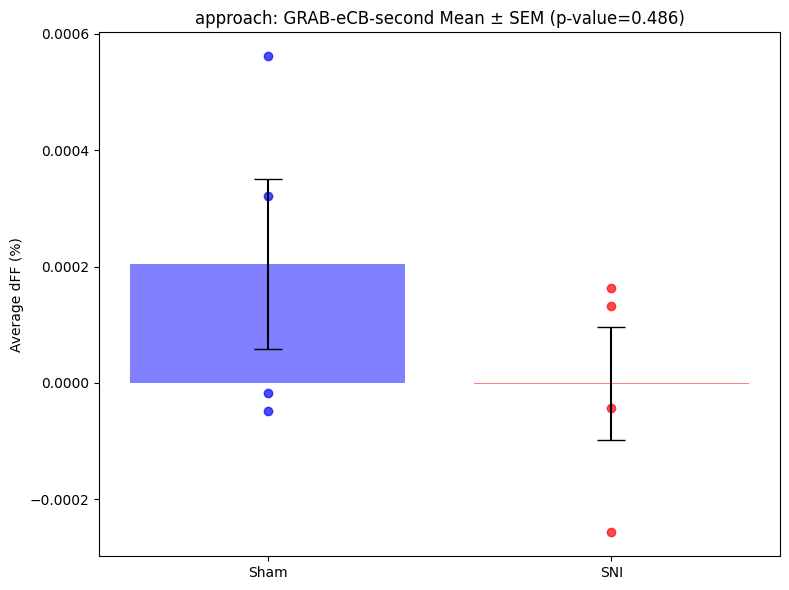

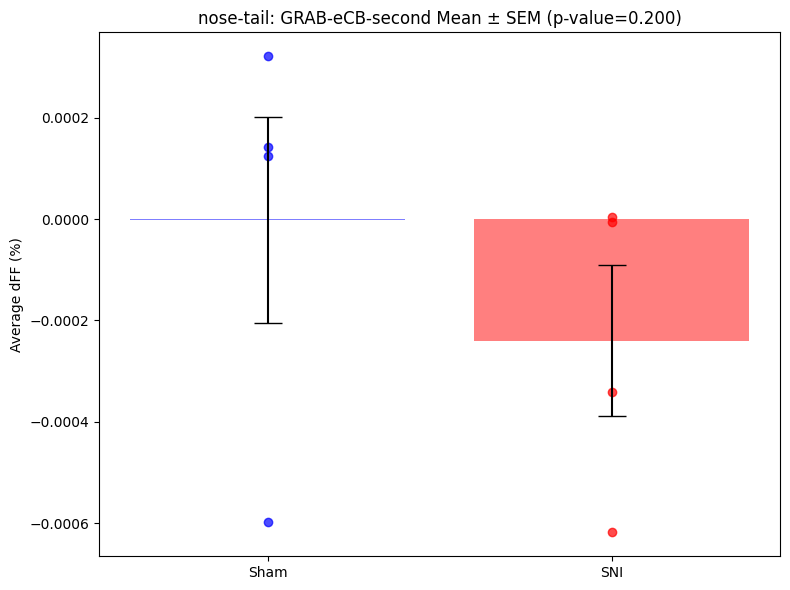

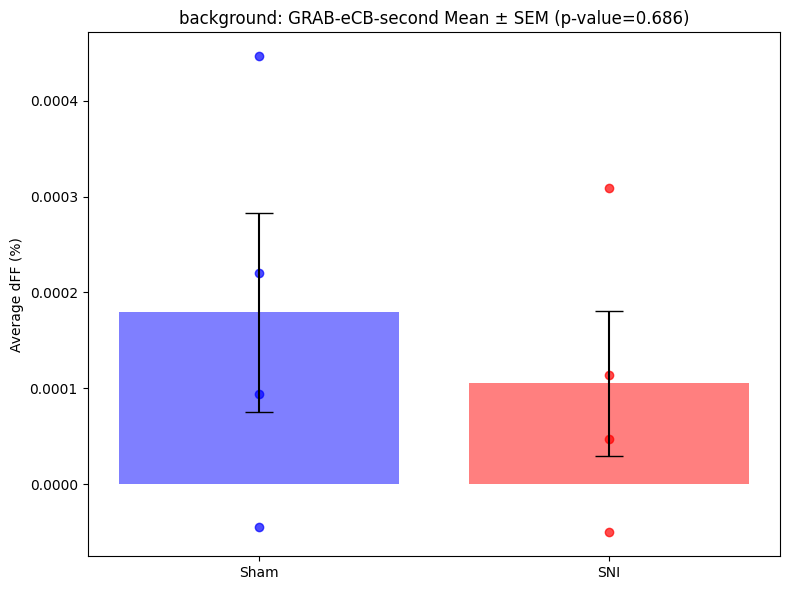

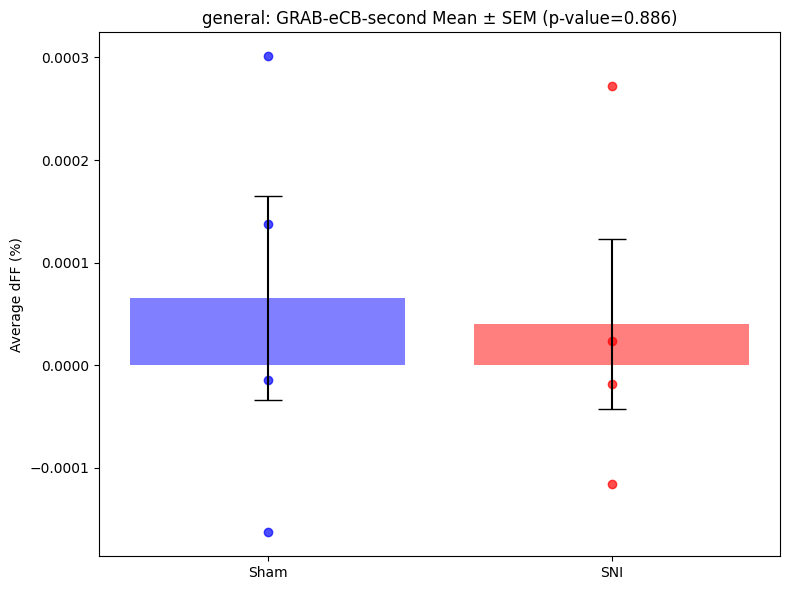

c:\Users\huang\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\huang\AppData\Local\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


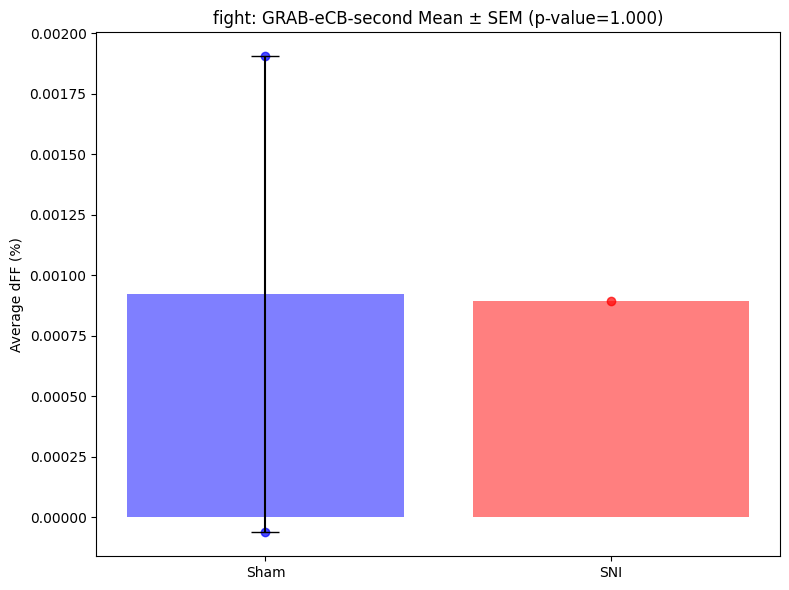

In [7]:
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Assuming process_ppd_file, led_events_df, sham_paths, sni_paths, sampling_rate, pre_start are defined elsewhere

def process_group_and_calculate_stats(ppd_directory_path, events_directory_path, onset_index):
    global behavior_trace_data
    behavior_trace_data = {}
    for ppd_file_path in glob.glob(os.path.join(ppd_directory_path, '**', '*.ppd'), recursive=True):
        process_ppd_file(ppd_file_path, led_events_df, events_directory_path)
    
    group_stats = {}
    for behavior, traces in behavior_trace_data.items():
        # Calculate stats for 3-5 seconds post-onset
        post_onset_data = [trace[onset_index + int(3 * sampling_rate) : onset_index + int(6 * sampling_rate)] for trace in traces]
        means = [np.mean(trace) for trace in post_onset_data]
        sems = [np.std(trace, ddof=1) / np.sqrt(len(trace)) for trace in post_onset_data]
        group_stats[behavior] = {
            "means": means,
            "sems": sems,
            "all_data": [np.mean(trace) for trace in post_onset_data]  # All individual data points
        }
    return group_stats

# Update your paths accordingly
onset_index = int(pre_start * sampling_rate)
sham_stats = process_group_and_calculate_stats(**sham_paths, onset_index=onset_index)
sni_stats = process_group_and_calculate_stats(**sni_paths, onset_index=onset_index)

for behavior in set(sham_stats).union(sni_stats):
    if behavior in sham_stats and behavior in sni_stats:
        # Mann-Whitney U test
        stat, p_value = mannwhitneyu(sham_stats[behavior]["all_data"], sni_stats[behavior]["all_data"])

        # Plotting
        fig, ax = plt.subplots(figsize=(8, 6))
        indices = np.arange(2)
        means = [np.mean(sham_stats[behavior]["all_data"]), np.mean(sni_stats[behavior]["all_data"])]
        sems = [np.std(sham_stats[behavior]["all_data"], ddof=1) / np.sqrt(len(sham_stats[behavior]["all_data"])),
                np.std(sni_stats[behavior]["all_data"], ddof=1) / np.sqrt(len(sni_stats[behavior]["all_data"]))]

        ax.bar(indices, means, yerr=sems, align='center', alpha=0.5, ecolor='black', capsize=10, color=['blue', 'red'])
        ax.set_ylabel('Average dFF (%)')
        ax.set_xticks(indices)
        ax.set_xticklabels(['Sham', 'SNI'])
        ax.set_title(f'{behavior}: GRAB-eCB-second Mean ± SEM (p-value={p_value:.3f})')

        # Scatter individual data points
        ax.scatter(np.zeros(len(sham_stats[behavior]["all_data"])), sham_stats[behavior]["all_data"], color='blue', alpha=0.7)
        ax.scatter(np.ones(len(sni_stats[behavior]["all_data"])), sni_stats[behavior]["all_data"], color='red', alpha=0.7)

        plt.tight_layout()
        plt.show()
